# Team Homework 2 - MATH 420
## James Boggs and Camilo Velez R
### NYC Covid Data

In [1]:
# activate env and instantiate pkgs
using Pkg
Pkg.activate("../p1")
Pkg.instantiate()

  Activating project at `~/m420p1/p1`


In [2]:
using CSV, DataFrames, Dates, LaTeXStrings, Plots, Distances, OrderedCollections, JuMP, GLPK # import necessary pkgs

In [3]:
df = CSV.read("../resources/data.csv", DataFrame) # entire df

v_infected = values(df[1, 13:end]) # vector of infected numbers
infected_dates = names(df[1, 13:end]) # vector of infected_dates
@assert length(v_infected) == length(infected_dates)

# Exercise 1

## 1)

In [4]:
yd = values(df[2, 13:end]); 

In [5]:
v(t::Int)::Int = v_infected[t]
y(t::Int)::Int = yd[t];

In [6]:
findfirst([x>=5 for x in v_infected])

46

In [7]:
y_deaths = values(df[2, 13+46:end]); # vector of deaths

$T_{0} = 46$

In [8]:
function I(t::Int, τ::Int=7)::Real
    t0 = 46
    return v(t+t0+τ) - v(t+t0-τ)
end

I (generic function with 2 methods)

In [9]:
popu=df.Population[1];
tmax = 119;

In [10]:
# Euler scheme
function euler(alpha, beta, N)::NTuple{3, Vector{Float64}}
  h = 0.01
  n = 2

  S_sim = Vector{Float64}(undef, 120)
  I_sim = Vector{Float64}(undef, 120)
  R_sim = Vector{Float64}(undef, 120)

  s = N
  i = I(0)
  r = 0

  t = 0

  S_sim[1] = s
  I_sim[1] = i
  R_sim[1] = r
  while n <= 120
    ds = -beta*s*(i/N)
    di = beta*s*(i/N) - alpha*i
    dr = alpha*i
  
    s += h*ds
    i += h*di
    r += h*dr
    t += h
    rt = round(t, digits=2);
    if isinteger(rt)
      S_sim[n] = s
      I_sim[n] = i
      R_sim[n] = r
      n += 1
    end
  end

  return S_sim, I_sim, R_sim
end

euler (generic function with 1 method)

In [11]:
Y = first(y_deaths, 120);

In [12]:
function J1(γ, Is, Rs, p)::Real
    λ = 1
    f1(t) = abs(I(t) - Is[t+1])^p
    f2(t) = abs(y_deaths[t+1] - γ*Rs[t+1])^p
    return sum(f1, 0:119) + λ*sum(f2, 0:119)
end


J1 (generic function with 1 method)

## $p=1$

In [13]:
Jd = OrderedDict()

OrderedDict{Any, Any}()

In [14]:
for α in 0.05:0.01:0.2
    for r0 in 1.5:0.1:1.9
        for nn in 2:0.5:10
            β = r0*α
            N = popu*nn/100
            Ss, Is, Rs = euler(α, β, N)
            ds = OrderedDict()
            for γ in 0:0.01:1
                ds[γ] = Cityblock()(Y, γ*Rs)
            end
            γ̂ = argmin(ds)
            Jd[(α, β, r0, N, γ̂)] = J1(γ̂, Is, Rs, 1)
        end
    end
end

In [15]:
α̂, β̂, r0̂, N̂, γ̂ = argmin(Jd)
J_min = Jd[argmin(Jd)];

In [16]:
display(L"\text{For}  p=1")
@show α̂, β̂, r0̂, N̂, γ̂;
display(L"J_{min}\approx %$(round(J_min, digits=3))")

L"$\text{For}  p=1$"

L"$J_{min}\approx 210606.567$"

(α̂, β̂, r0̂, N̂, γ̂) = (0.17, 0.323, 1.9, 48861.18, 0.08)


### 2)

In [17]:
function Jplot(α, β, p)
    S, I, R = euler(α, β, N̂)
    return J1(γ̂, I, R, p)
end

Jplot (generic function with 1 method)

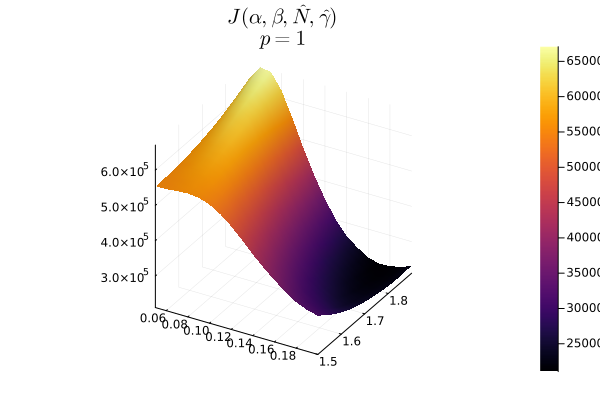

In [18]:
surface(0.05:0.01:0.2, 1.5:0.01:1.9, (x,y) -> Jplot(x, x*y, 1))
surface!(title=L"J(\alpha, \beta, \hat{N}, \hat{\gamma})"*"\n"*L"p=1")

### 3)

In [19]:
Ss, Is, Rs = euler(α̂, β̂, N̂);

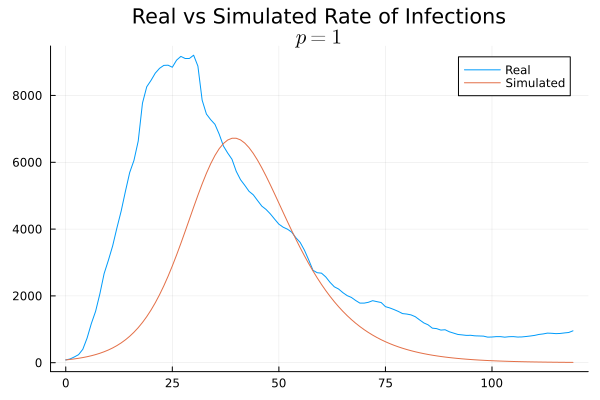

In [20]:
plot(0:119, I, labels="Real")
plot!(0:119, Is, label="Simulated")
plot!(title = "Real vs Simulated Rate of Infections" * "\n" * L"p=1")

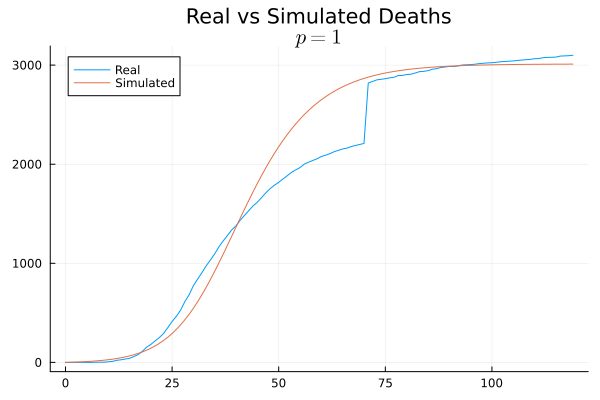

In [21]:
plot(0:119, Y, labels="Real")
plot!(0:119, γ̂*Rs, label="Simulated")
plot!(title = "Real vs Simulated Deaths" * "\n" * L"p=1")

#### $p=2$

In [22]:
Jd = OrderedDict()
for α in 0.05:0.01:0.2
    for r0 in 1.5:0.1:1.9
        for nn in 2:0.5:10
            β = r0*α
            N = popu*nn/100
            Ss, Is, Rs = euler(α, β, N)
            ds = OrderedDict()
            for γ in 0:0.01:1
                ds[γ] = Euclidean()(Y, γ*Rs)
            end
            γ̂ = argmin(ds)
            Jd[(α, β, r0, N, γ̂)] = J1(γ̂, Is, Rs, 2)
        end
    end
end

In [23]:
α̂, β̂, r0̂, N̂, γ̂ = argmin(Jd)
J_min = Jd[argmin(Jd)];

In [24]:
display(L"\text{For}  p=2")
@show α̂, β̂, r0̂, N̂, γ̂;
display(L"J_{min}\approx %$(round(J_min, digits=3))")

L"$\text{For}  p=2$"

L"$J_{min}\approx 5.31871140527e8$"

(α̂, β̂, r0̂, N̂, γ̂) = (0.2, 0.38, 1.9, 57004.71, 0.06)


### 2)

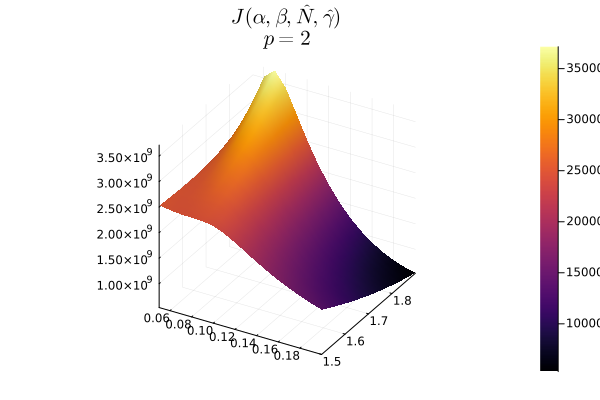

In [25]:
surface(0.05:0.01:0.2, 1.5:0.01:1.9, (x,y) -> Jplot(x, x*y, 2))
surface!(title=L"J(\alpha, \beta, \hat{N}, \hat{\gamma})"*"\n"*L"p=2")

### 3)

In [26]:
Ss, Is, Rs = euler(α̂, β̂, N̂);

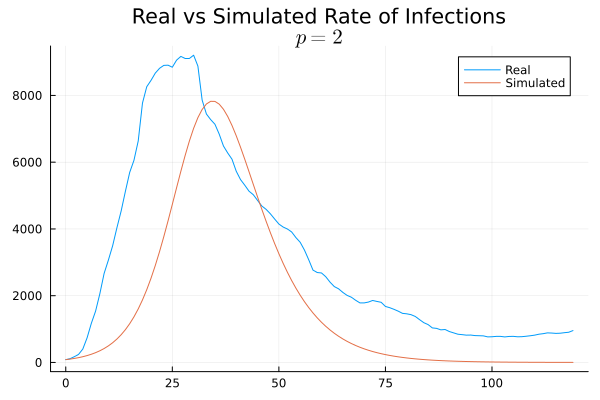

In [27]:
plot(0:119, I, labels="Real")
plot!(0:119, Is, label="Simulated")
plot!(title = "Real vs Simulated Rate of Infections" * "\n" * L"p=2")

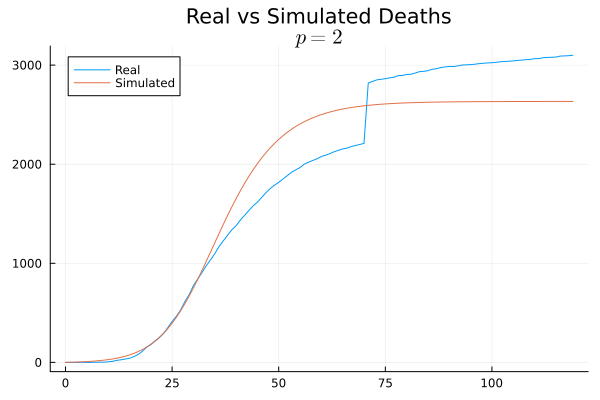

In [28]:
plot(0:119, Y, labels="Real")
plot!(0:119, γ̂*Rs, label="Simulated")
plot!(title = "Real vs Simulated Deaths" * "\n" * L"p=2")

### $p=\infty$

In [29]:
function J2(γ, Is, Rs, p)::Real
    λ = 1
    f1(t) = abs(I(t) - Is[t+1])
    f2(t) = abs(y_deaths[t+1] - γ*Rs[t+1])
    return maximum(f1, 0:119) + λ*maximum(f2, 0:119)
end

J2 (generic function with 1 method)

In [30]:
Jd = OrderedDict()
for α in 0.05:0.01:0.2
    for r0 in 1.5:0.1:1.9
        for nn in 2:0.5:10
            β = r0*α
            N = popu*nn/100
            Ss, Is, Rs = euler(α, β, N)
            ds = OrderedDict()
            for γ in 0:0.01:1
                ds[γ] = maximum(Y - γ*Rs)
            end
            γ̂ = argmin(ds)
            Jd[(α, β, r0, N, γ̂)] = J1(γ̂, Is, Rs, 2)
        end
    end
end

In [31]:
α̂, β̂, r0̂, N̂, γ̂ = argmin(Jd)
J_min = Jd[argmin(Jd)];

In [32]:
display(L"\text{For}  p=∞")
@show α̂, β̂, r0̂, N̂, γ̂;
display(L"J_{min}\approx %$(round(J_min, digits=3))")

L"$\text{For}  p=∞$"

L"$J_{min}\approx 5.7385904742e8$"

(α̂, β̂, r0̂, N̂, γ̂) = (0.2, 0.38, 1.9, 65148.24, 0.07)


In [33]:
function Jplot2(α, β, p)
    S, I, R = euler(α, β, N̂)
    return J2(γ̂, I, R, p)
end

Jplot2 (generic function with 1 method)

### 2)

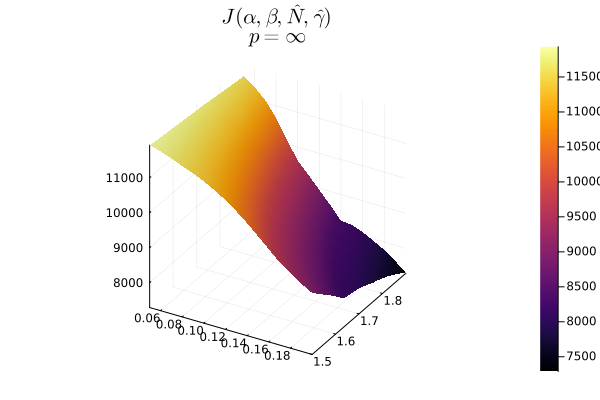

In [34]:
surface(0.05:0.01:0.2, 1.5:0.01:1.9, (x,y) -> Jplot2(x, x*y, 2))
surface!(title=L"J(\alpha, \beta, \hat{N}, \hat{\gamma})"*"\n"*L"p=∞")

### 3)

In [35]:
Ss, Is, Rs = euler(α̂, β̂, N̂);

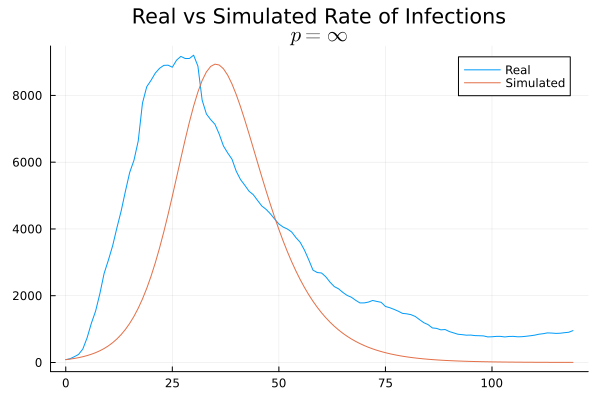

In [36]:
plot(0:119, I, labels="Real")
plot!(0:119, Is, label="Simulated")
plot!(title = "Real vs Simulated Rate of Infections" * "\n" * L"p=∞")

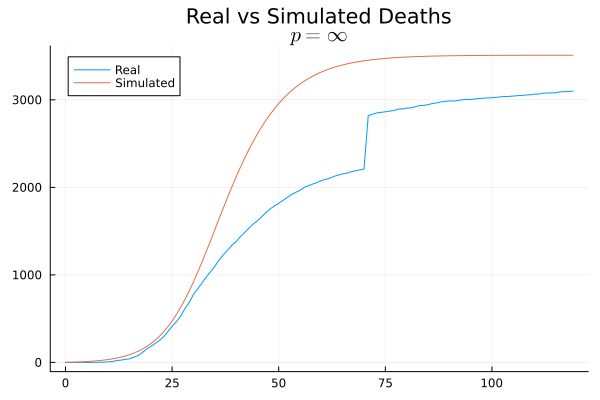

In [37]:
plot(0:119, Y, labels="Real")
plot!(0:119, γ̂*Rs, label="Simulated")
plot!(title = "Real vs Simulated Deaths" * "\n" * L"p=∞")

# Excercise 2

In [1]:
df = CSV.read("../resources/data.csv", DataFrame) # entire df

infected = values(df[1, 13:end]) # vector of infected numbers
deaths = values(df[2, 13:end]) # vector of death numbers
infected_dates = names(df[1, 13:end]) # vector of infected_dates
population = df.Population[1];
@assert length(infected) == length(deaths)

LoadError: UndefVarError: CSV not defined

In [2]:
Vmin = 5
τ0 = 7
λ = 1

t0 = findfirst([x>=Vmin for x in infected])
tmax = 119

LoadError: UndefVarError: infected not defined

In [3]:
# I(t) = v(t + t0 + τ ) − v(t + t0 − τ )
V(t) = infected[t + t0]
Y(t) = deaths[t + t0]
I(t) = infected[t + t0 + τ0] - infected[t + t0 - τ0]

I (generic function with 1 method)

In [4]:
function euler(alpha, beta, delta, N)
    h = 0.01

    S_sim = zeros(tmax+1)
    E_sim = zeros(tmax+1)
    I_sim = zeros(tmax+1)
    R_sim = zeros(tmax+1)
  
    s = N
    e = I(0)
    i = I(0)
    r = 0
  
    t = 0
    while t < tmax + 0.0001
      if abs(round(Int, t) - t) < 0.0001
        S_sim[round(Int, t)+1] = s 
        E_sim[round(Int, t)+1] = e
        I_sim[round(Int, t)+1] = i 
        R_sim[round(Int, t)+1] = r 
      end
  
      ds = -beta*s*(i/N)
      de = beta*s*(i/N) - delta*e
      di = delta*e - alpha*i
      dr = alpha*i
    
      s += h*ds
      e += h*de
      i += h*di
      r += h*dr
      t += h
    end
  
    return S_sim, E_sim, I_sim, R_sim
  end

euler (generic function with 1 method)

In [5]:
function optGamma(R_sim, p)
    if p == 2
        s1(t) = Y(t)*R_sim[t+1]
        s2(t) = abs(R_sim[t+1])^2
        gamma_c = sum(s1, 0:tmax)/sum(s2, 0:tmax)
        if gamma_c < 0 
            return 0
        elseif gamma_c > 1
            return 1
        else
            return gamma_c
        end
    elseif p == 1
        min = Inf
        minimizer = -1
        for k in 0:tmax
            r = Y(k)/R_sim[k+1]
            if r >= 0 && r <= 1
                
                s3(t) = abs(Y(t) - r*R_sim[t+1])
                f = sum(s3, 0:tmax)
                if f < min
                    min = f
                    minimizer = r
                end
            end
        end

        return minimizer
    else
        model = Model()
        set_optimizer(model,GLPK.Optimizer)

        @variable(model, x1>= 0)
        @variable(model, 1>=x2>=0)

        for t = 0:tmax
            @constraint(model, -x1 + (-R_sim[t+1])*x2 <= -Y(t))
            @constraint(model, -x1 + (R_sim[t+1])*x2 <= Y(t))
        end

        @objective(model, Min, x1)
        optimize!(model)

        return value.(x2)
    end
end

LoadError: LoadError: UndefVarError: @variable not defined
in expression starting at In[5]:34

In [ ]:
function J(alpha, beta, delta, N, gamma, p, I_sim, R_sim)
    is_inf = false
    if p == 3
       is_inf = true
       p = 1
    end

    s1(t) = abs(I(t) - I_sim[t+1])^p
    s2(t) = abs(Y(t) - gamma*R_sim[t+1])^p

    if is_inf
        return maximum(s1.(0:tmax) + λ*s2.(0:tmax))
    else
        return sum(s1, 0:tmax) + λ*sum(s2, 0:tmax)
    end
end

In [ ]:
min = [Inf, Inf, Inf]
minimizer = [(-1.0,-1.0,-1.0,-1.0,-1.0), (-1.0,-1.0,-1.0,-1.0,-1.0), (-1.0,-1.0,-1.0,-1.0,-1.0)]

values_2 = Dict()

for alpha in 0.05:0.05:0.4
    for beta in (1.5:0.1:1.9)*alpha
        for delta in 0.05:0.05:0.4
            for N in (2:10)*(population/100)
                S_sim, E_sim, I_sim, R_sim = euler(alpha, beta, delta, N) 

                for p in 1:3
                    gamma = optGamma(R_sim, p)
                    objective_function = J(alpha, beta, delta, N, gamma, p, I_sim, R_sim)
                    if objective_function < min[p]
                        min[p] = objective_function
                        minimizer[p] = (alpha, beta, delta, N, gamma)
                    end
                end
            end
        end
    end
end
println("min is $(min), minimizer is $(minimizer)")

## (1)

In [ ]:
display_p = ["1", "2", "∞"]

for p in 1:3
    println("p = " * display_p[p] * ":")
    println("minimum of J(alpha, beta, delta, N, gamma) = $(min[p])")
    println("alpha = $(minimizer[p][1]), beta = $(minimizer[p][2]), delta = $(minimizer[p][3]), N = $(minimizer[p][4]), gamma = $(minimizer[p][5])")
    println("")
end

## (2)

In [ ]:
for p in 1:3
    alpha, beta, delta, N, gamma = minimizer[p]

    function f_plot1(alpha, beta)
        S_sim, E_sim, I_sim, R_sim = euler(alpha, beta, delta, N)
        return J(alpha, beta, delta, N, gamma, p, I_sim, R_sim)
    end
    display(surface(0.05:0.05:0.4, (1.5:0.1:1.9)*alpha, f_plot, label = ["alpha" "beta" "J(alpha, beta, N, delta, gamma)"], title = L"J(\alpha, \beta, \hat{\delta}, \hat{N}, \hat{\gamma}) \quad for \quad p =" * display_p[p],
        zlabel=L"J(\alpha, \beta, \hat{\delta}, \hat{N}, \hat{\gamma})", xlabel=L"\alpha", ylabel=L"\beta"))

    function f_plot2(alpha, delta)
        S_sim, E_sim, I_sim, R_sim = euler(alpha, beta, delta, N)
        return J(alpha, beta, delta, N, gamma, p, I_sim, R_sim)
    end
    display(surface(0.05:0.05:0.4, 0.05:0.05:0.4, f_plot, label = ["alpha" "beta" "J(alpha, delta, N, delta, gamma)"], title = L"J(\alpha, \hat{\beta}, \delta, \hat{N}, \hat{\gamma}) \quad for \quad p =" * display_p[p],
        zlabel=L"J(\alpha, \hat{\beta}, \delta, \hat{N}, \hat{\gamma})", xlabel=L"\alpha", ylabel=L"\delta"))

    function f_plot2(beta, delta)
        S_sim, E_sim, I_sim, R_sim = euler(alpha, beta, delta, N)
        return J(alpha, beta, delta, N, gamma, p, I_sim, R_sim)
    end
    display(surface((1.5:0.1:1.9)*alpha, 0.05:0.05:0.4, f_plot, label = ["alpha" "beta" "J(alpha, delta, N, delta, gamma)"], title = L"J(\hat{\alpha}, \beta, \delta, \hat{N}, \hat{\gamma}) \quad for \quad p =" * display_p[p],
        zlabel=L"J(\hat{\alpha}, \beta, \delta, \hat{N}, \hat{\gamma})", xlabel=L"\beta", ylabel=L"\delta"))
end

## (3)

In [ ]:
for p = 1:3
    alpha, beta, delta, N, gamma = minimizer[p]
    S_sim, E_sim, I_sim, R_sim = euler(alpha, beta, delta, N)

    display(plot(0:tmax, [I.(0:tmax), I_sim], label = ["Observed" "Simulated"], title="Rates of Active Infections for p = " * display_p[p], xlabel=L"t", ylabel=L"Rate \quad I(t)"))
    display(plot(0:tmax, [Y.(0:tmax), gamma*R_sim], label = ["Observed" "Simulated"], title="Cumulative Deaths for p = " * display_p[p], xlabel=L"t", ylabel=L"Y(t)"))
end

In [ ]:
Jd = OrderedDict()
for α in 0.05:0.01:0.2
    for r0 in 1.5:0.1:1.9
        for nn in 2:0.5:10
            β = r0*α
            N = popu*nn/100
            Ss, Is, Rs = euler(α, β, N)
            ds = OrderedDict()
            for γ in 0:0.01:1
                ds[γ] = Euclidean()(Y, γ*Rs)
            end
            γ̂ = argmin(ds)
            Jd[(α, β, r0, N, γ̂)] = J1(γ̂, Is, Rs, 2)
        end
    end
end

In [ ]:
#

### a)

#### ii)

In [9]:
f1(t::Int, n::Int) = t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))

f1 (generic function with 1 method)

In [10]:
tmax = 119;
β̂_min = 6/(tmax*(tmax+1)*(2tmax+1))*(sum(x -> f1(x, Nmin), 1:tmax))

0.13807405982926169

In [11]:
β̂_max = 6/(tmax*(tmax+1)*(2tmax+1))*(sum(x -> f1(x, Nmax), 1:tmax))

0.10515569276026039

Values for estimated $\beta$:
* For $N_{max}: \hat{\beta} \approx 0.105$
* For $N_{min}: \hat{\beta} \approx 0.138$

In [12]:
beta = Dict(Nmin=> β̂_min, Nmax => β̂_max)

Dict{Int64, Float64} with 2 entries:
  27717   => 0.138074
  1628706 => 0.105156

In [13]:
j_helper(t, n) = (beta[n]*t - log(I(t)/(n - I(t))) + log(I(0)/(n - I(0))))^2
j_helper(t, n, b) = (b*t - log(I(t)/(n - I(t))) + log(I(0)/(n - I(0))))^2
J(n::Int) = sum(x -> j_helper(x, n), 0:tmax)
J(n::Int, beta::Real) = sum(x -> j_helper(x, n, beta), 0:tmax)

J (generic function with 2 methods)

In [15]:
J(Nmin)

874.1086923318926

In [16]:
J(Nmax)

1078.5175521773804

$J(\beta, N)$:
* For $N_{min}: J(\beta, N) \approx 874.109$:
* For $N_{max}: J(\beta, N) \approx 1078.517$:

#### ii)

In [17]:
using Plots

In [106]:
function predict1(n::Int, t::Int)
    (n*I(0))/(I(0) + (n - I(0))*exp(-beta[n]*t))
end
function predict1(n::Int, t::Int, beta::Real)
    (n*I(0))/(I(0) + (n - I(0))*exp(-beta*t))
end

predict1 (generic function with 2 methods)

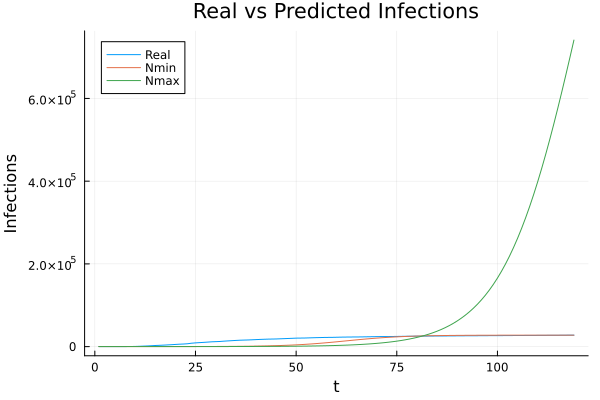

In [128]:
plot(1:tmax, [I.(1:tmax), [predict1(Nmin, x) for x in 1:tmax], [predict1(Nmax, x) for x in 1:tmax]],
label = ["Real" "Nmin" "Nmax"], title="Real vs Predicted Infections", xlabel="t", ylabel="Infections")

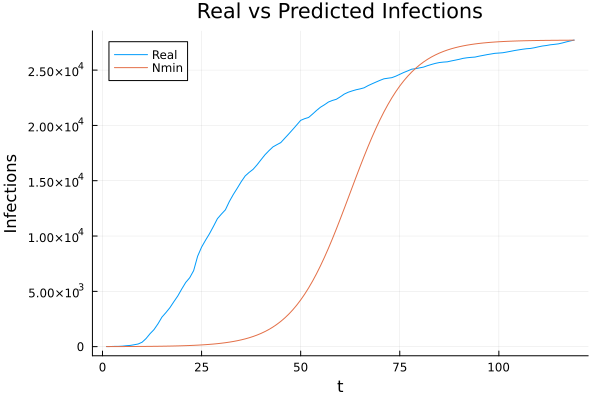

In [127]:

plot(1:tmax, [I.(1:tmax), [predict1(Nmin, x) for x in 1:tmax]], 
label = ["Real" "Nmin"], title="Real vs Predicted Infections", xlabel="t", ylabel="Infections")

### b)

#### i)

In [21]:
function J2(n::Int)::Real
    a = 6/(tmax*(tmax+1)*(2*tmax+1))
    s1(t::Int) = abs(log((I(t)*(n - I(0))) / (I(0)*(n - I(t)))))^2
    s2(t::Int) =   t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))
    r = sum(s1, 1:tmax) - a*(sum(s2, 1:tmax))^2
    return r
end
    

J2 (generic function with 1 method)

In [22]:
using OrderedCollections
J_dict = OrderedDict()
for x in 0:20
    n = Nmin + x;
    a = J2(n);
    x != 0 && (a > J_dict[n-1]) && break
    J_dict[n] = a;
end


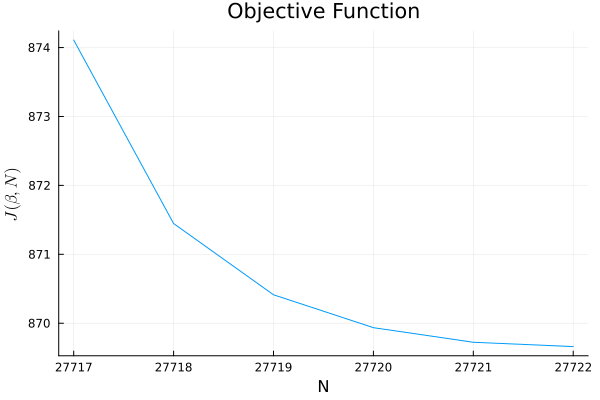

In [103]:
plot(collect(keys(J_dict)), collect(values(J_dict)), title="Objective Function", labels=false,
xlabel="N", ylabel=L"J(\beta, N)")

Chosen $N = 27722$


In [24]:
function beta_n(n)
    a = (6/(tmax*(tmax + 1)*(2*tmax + 1)))
    s1(t::Int) = t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))
    r = a*sum(s1, 1:tmax)
    return r
end

beta_n (generic function with 1 method)

#### ii)

In [134]:
for n in collect(keys(J_dict))
    println("N = $(n), \u03b2 = $(beta_n(n)), J(N, \u03b2) = $(J(n, beta_n(n)))")
end

N = 27717, β = 0.13807405982926169, J(N, β) = 874.1086923318926
N = 27718, β = 0.13791749425672672, J(N, β) = 871.4460941052558
N = 27719, β = 0.13782116238725073, J(N, β) = 870.4123166790648
N = 27720, β = 0.1377495196610878, J(N, β) = 869.9350949181711
N = 27721, β = 0.13769142625603764, J(N, β) = 869.7233379562639
N = 27722, β = 0.13764191977787016, J(N, β) = 869.6605870788865


#### iii)

In [26]:
chosen_n = collect(keys(J_dict))[end]

27722

In [27]:
predicted2 = predict1.(chosen_n, 0:tmax, beta_n(chosen_n));

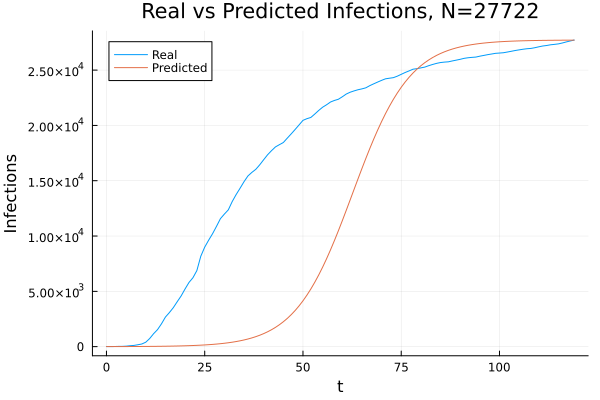

In [135]:
plot(0:tmax, [I.(0:tmax), predicted2], labels=["Real" "Predicted"],
title="Real vs Predicted Infections, N=$(chosen_n)", xlabel="t", ylabel="Infections")

#### iv)

In [84]:
x = Nmin:100:Nmax
y = J2.(Nmin:100:Nmax);

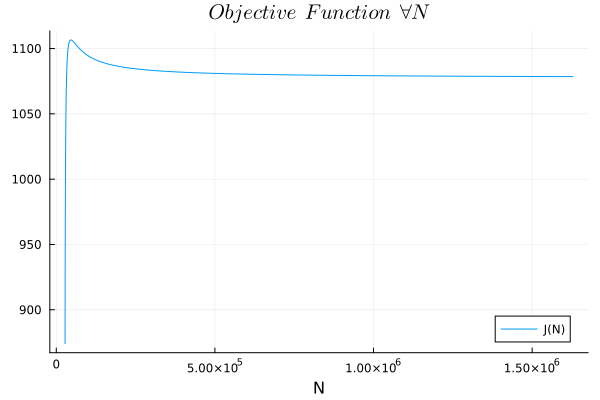

In [97]:
plot(x, y, labels="J(N)", title=L"Objective \enspace Function \enspace \forall N", xlabel="N")

Based on plot we can see that the min $N$ will have to be $\approx \lt 100,000$, running the search on every possible $N$ took too long so we will narrow down the search

In [31]:
min_j = J2(Nmin);
min_n = Nmin;
for x in Nmin:(Nmin+100000)
    curr = J2(x);
    if curr < min_j
        min_j = curr;
        min_n = x;
    end
end

In [32]:
min_j = J2(Nmin);
min_n = Nmin;
for x in Nmin:(Nmin+100000)
    curr = J2(x);
    if curr < min_j
        min_j = curr;
        min_n = x;
    end
end

println("The minimum on this interval is at N = $(min_n)")

The minimum on this interval is at N = 27722


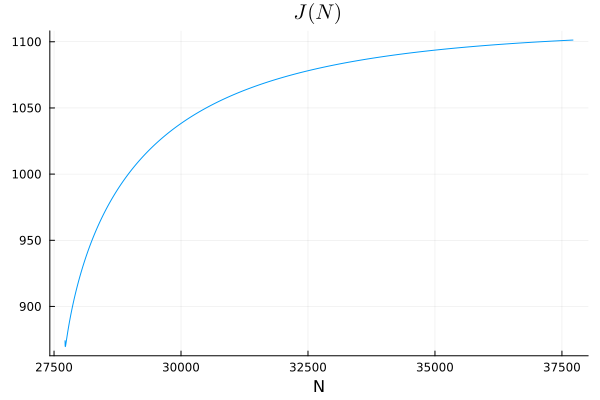

In [140]:
plot(Nmin:Nmin+10^4, J2, labels=false, title=L"J(N)", xlabel="N")

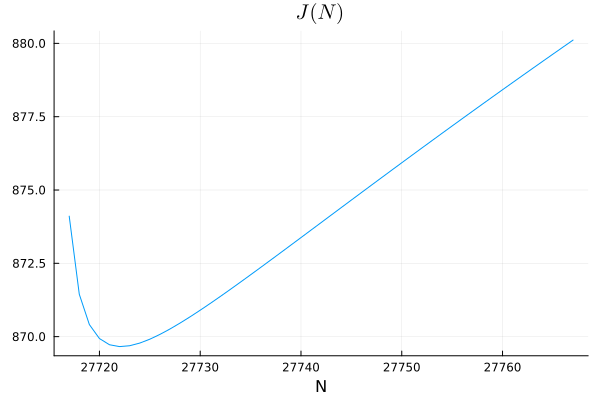

In [142]:
plot(Nmin:Nmin+50, J2, title=L"J(N)", xlabel="N", labels=false)

This $N=27722$ is the same $N$ as we got before in part (b.ii)

### c)

In [33]:
function Ideal(n, b)
    s1(t::Int) = (I(t) - ((n*I(0)) / (I(0) + (n - I(0))*exp(-b*t))))^2
    r = sum(s1, 0:tmax)
    return r
end

Ideal (generic function with 1 method)

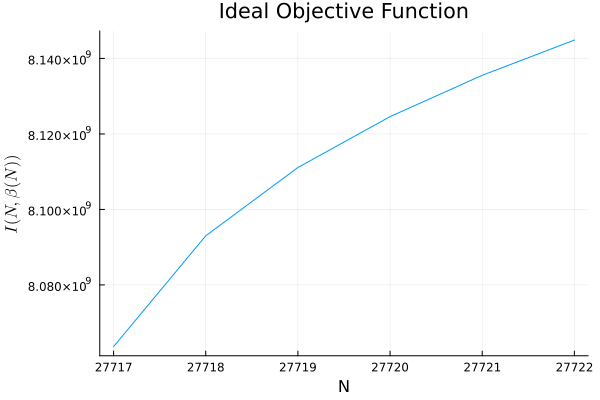

In [81]:
x = collect(keys(J_dict))
plot(x, Ideal.(x, beta_n.(x)), labels = false, title="Ideal Objective Function", xlabel="N", ylabel=L"I(N, \beta(N))")

This does not match the findings in (b.ii), now the minimum is at $N = 27717 = N_{min}$ unlike before in part (b.ii) where it was $N = 27722$

# Exercise 2

In [35]:
new_vt = values(df[1, 13:end]); # include values before t0 >=5

## 1)

In [36]:
v(t::Int) = new_vt[t]
# rate of active infection 
function I2(t::Int)::Real
    t0 = 46
    τ = 7
    return v(t+t0+τ) - v(t+t0-τ)
end

I2 (generic function with 1 method)

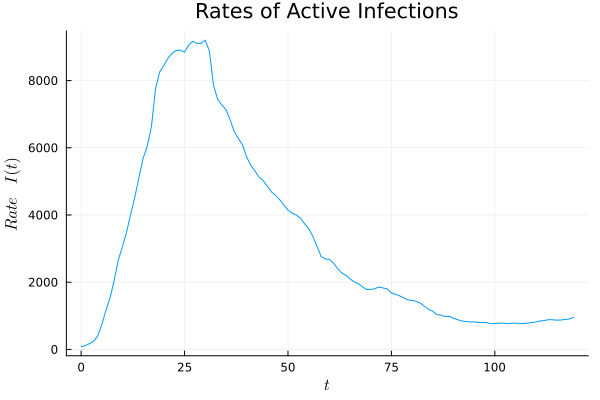

In [79]:
plot(0:tmax, I2.(0:tmax), labels = false, title="Rates of Active Infections", xlabel=L"t", ylabel=L"Rate \quad I(t)")

## 2)

In [38]:
# Euler scheme
function euler(alpha, beta, N)
  h = 0.01

  I_sim = zeros(tmax+1)

  s = N
  i = I2(0)
  r = 0

  t = 0
  while t < tmax + 0.0001
    if abs(round(Int, t) - t) < 0.0001
      I_sim[round(Int, t)+1] = i 
    end

    ds = -beta*s*(i/N)
    di = beta*s*(i/N) - alpha*i
    dr = alpha*i
  
    s += h*ds
    i += h*di
    r += h*dr
    t += h
  end

  return I_sim
end

euler (generic function with 1 method)

## 3)

In [39]:
# J(alpha, beta, N)
function J3(I_sim)
  s1(t) = (I2(t) - I_sim[t+1])^2
  return sum(s1, 0:tmax)
end

J3 (generic function with 1 method)

In [40]:
# run the Euler scheme for each element of omega and save the resulting J(alpha, beta, N) value
triplets = Dict()

for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    for beta in (0.8:0.1:1.6)*alpha
        for N in (1:10)*(Nmax/10)
            triplets[(alpha, beta, N)] = J3(euler(alpha, beta, N));
        end
    end
end

## 4)

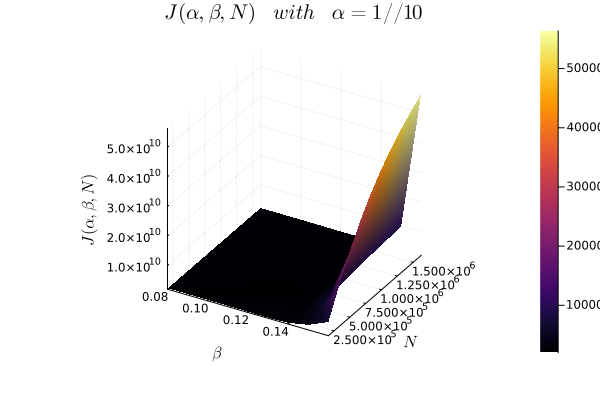

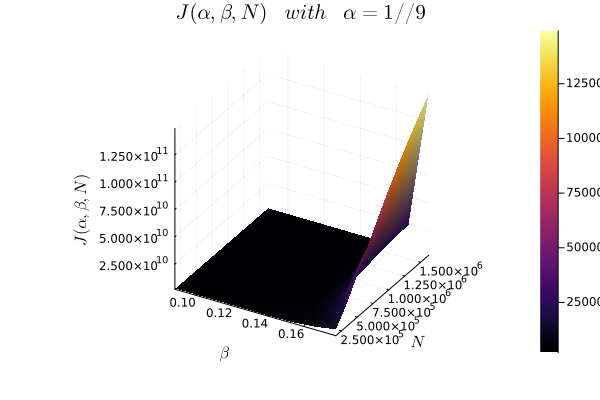

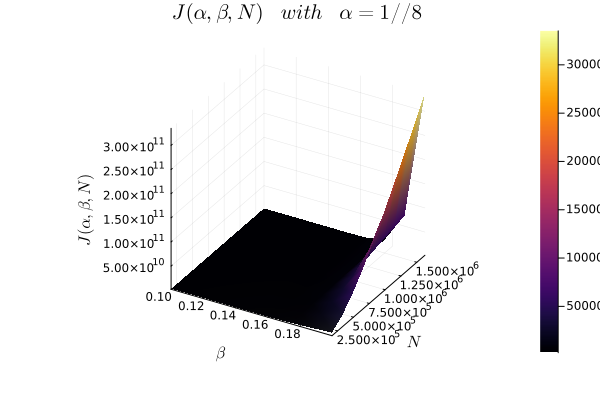

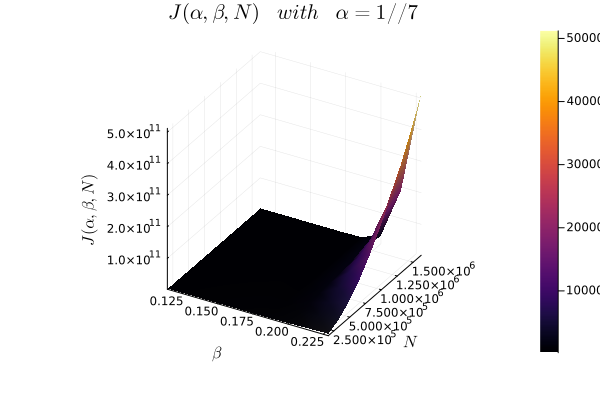

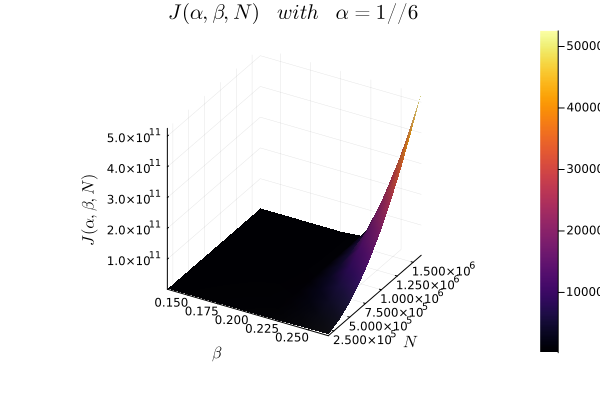

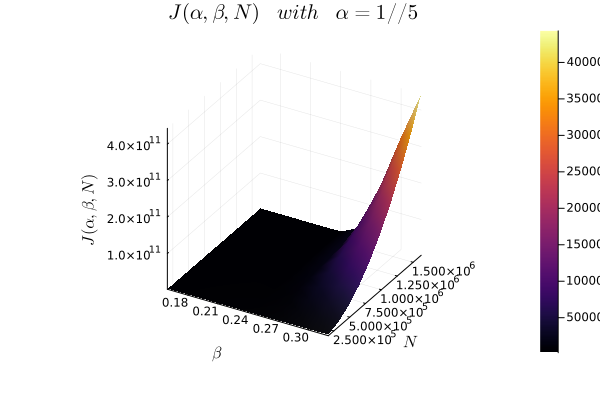

In [73]:
for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    f_plot(beta, N) = triplets[(alpha, beta, N)];
    display(surface((0.8:0.1:1.6)*alpha, (1:10)*(Nmax/10), f_plot, label = [L"\beta" "N" "J(\u03b1, \u03b2, N)"], title = L"J(\alpha, \beta, N)\quad with \quad \alpha = %$(rationalize(alpha))",
    zlabel=L"J(\alpha, \beta, N)", xlabel=L"\beta", ylabel=L"N"))
end


In [61]:
# compute alpha, beta, N that minimize J(alpha, beta, N)
min_j = triplets[(1/10, 1/10, Nmax)];
min_alpha = 1/10;
min_beta = 1/10;
min_N = Nmax;

for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    for beta in (0.8:0.1:1.6)*alpha
        for N in (1:10)*(Nmax/10)
            if triplets[(alpha, beta, N)] < min_j
                min_j = triplets[(alpha, beta, N)]
                min_alpha = alpha;
                min_beta = beta;
                min_N = N;
            end
        end
    end
end

println("Minimum value of J(\u03b1, \u03b2, N) occurs at \u03b1 = $(min_alpha), \u03b2 = $(min_beta), N = $(min_N)")

Minimum value of J(α, β, N) occurs at α = 0.2, β = 0.24000000000000002, N = 162870.6
